In [2]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

In [3]:
data = sitk.ReadImage("/data/hpc/spine/dataset/spine_nii/images/83_t1.nii.gz")

test = sitk.Flip(data, [False, False, True])

(367, 615, 32)


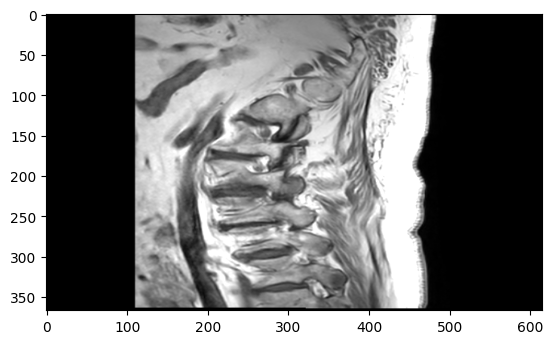

In [4]:
image = sitk.GetArrayFromImage(data)
print(image.shape)
plt.imshow(image[:,:,10], cmap="gray")

In [5]:
print(data.GetSize()) 
print(data)

(32, 615, 367)
Image (0x2587630)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 1837
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1812
  UpdateMTime: 1833
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [32, 615, 367]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [32, 615, 367]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [32, 615, 367]
  Spacing: [3.2961, 0.461304, 0.770839]
  Origin: [-51.7295, -83.6991, -251.322]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
3.2961 0 0
0 0.461304 0
0 0 0.770839

  PointToIndexMatrix: 
0.303389 0 0
0 2.16777 0
0 0 1.29729

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x21645e0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned 

In [42]:
print(data.GetSpacing())

# data.SetSpacing((1.5, 0.625, 0.5))
data.SetSpacing((0.5, 1.5, 2))

print(data.GetSpacing())
print(data.GetSize())

(3.337801456451416, 0.625, 0.37377050518989563)
(0.5, 1.5, 2.0)
(30, 448, 762)


In [43]:
def change_spacing(image, new_spacing, interpolator=sitk.sitkLinear):
    original_spacing = image.GetSpacing()
    original_size = image.GetSize()
    
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in zip(original_size, original_spacing, new_spacing)]
    new_size = tuple(new_size)
    
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(new_size)
    resample.SetOutputDirection(image.GetDirection())
    resample.SetOutputOrigin(image.GetOrigin())
    resample.SetInterpolator(interpolator)
    
    return resample.Execute(image)

def get_new_size(original_spacing, original_size, new_spacing):
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in zip(original_size, original_spacing, new_spacing)]
    new_size = tuple(new_size)

    return new_size

def transpose_img(data, order):
    
    return sitk.PermuteAxes(data, order)

In [117]:
folder_path= "/data/hpc/spine/dataset/spine_nii/images"
image_path = os.listdir(folder_path)
print(image_path)

voxel_space = []
voxel_size = []

median_space =[1.75, 0.625, 0.58742571] ##[3.30972338, 0.625, 0.58742571]  ##[0.5859375, 0.625, 0.66275334] ##[3.30972338, 0.625, 0.66275334]
for path in image_path:
    print(path)
    data = sitk.ReadImage(os.path.join(folder_path, path))
    space = data.GetSpacing()
    o_size = data.GetSize()
    if np.argmax(space) != 0:
        space = space[::-1]
        o_size = o_size[::-1]
        transposed_image = sitk.PermuteAxes(data, [2, 0, 1])
        transposed_image = sitk.Flip(transposed_image, [False, False, True])
        sitk.WriteImage(transposed_image, os.path.join(folder_path, path))

    voxel_space.append(space)

    # voxel_size.append(change_spacing(data, median_space).GetSize())

    voxel_size.append(get_new_size(space, o_size, median_space))



['88_t1.nii.gz', '6_t2.nii.gz', '45_t2_SPACE.nii.gz', '152_t2.nii.gz', '185_t1.nii.gz', '253_t1.nii.gz', '197_t2.nii.gz', '140_t1.nii.gz', '13_t1.nii.gz', '241_t2.nii.gz', '152_t2_SPACE.nii.gz', '168_t1.nii.gz', '65_t1.nii.gz', '136_t1.nii.gz', '237_t2.nii.gz', '29_t2.nii.gz', '124_t2.nii.gz', '225_t1.nii.gz', '252_t1.nii.gz', '184_t1.nii.gz', '7_t2.nii.gz', '110_t2_SPACE.nii.gz', '12_t1.nii.gz', '196_t2.nii.gz', '236_t2.nii.gz', '137_t1.nii.gz', '64_t1.nii.gz', '169_t1.nii.gz', '224_t1.nii.gz', '125_t2.nii.gz', '28_t2.nii.gz', '195_t2.nii.gz', '142_t1.nii.gz', '11_t1.nii.gz', '243_t2.nii.gz', '98_t2.nii.gz', '142_t2_SPACE.nii.gz', '187_t1.nii.gz', '251_t1.nii.gz', '4_t2.nii.gz', '5_t2_SPACE.nii.gz', '75_t2.nii.gz', '227_t1.nii.gz', '55_t2_SPACE.nii.gz', '67_t1.nii.gz', '39_t1.nii.gz', '99_t2.nii.gz', '242_t2.nii.gz', '10_t1.nii.gz', '143_t1.nii.gz', '5_t2.nii.gz', '209_t2_SPACE.nii.gz', '250_t1.nii.gz', '186_t1.nii.gz', '151_t2.nii.gz', '179_t2.nii.gz', '226_t1.nii.gz', '74_t2.nii.gz'

[3.30972338 0.625      0.58742571]
[3.22159672 0.46875    0.43579951]


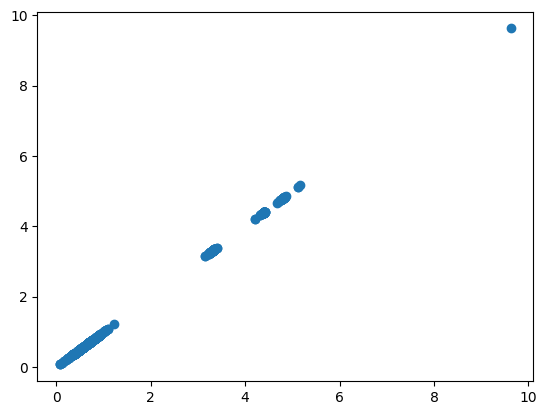

In [44]:
voxel_space = np.array(voxel_space)

median_voxel_space = np.median(voxel_space, axis=0)

print(median_voxel_space)
quantile_voxel_space = np.quantile(voxel_space, 0.1, axis=0)
print(quantile_voxel_space)
plt.scatter(voxel_space, voxel_space)

In [45]:
voxel_size = np.array(voxel_size)
np.set_printoptions(threshold=np.inf)

median_voxel_size = np.median(voxel_size, axis=0)
min_voxel_size = np.min(voxel_size, axis=0)


print(min_voxel_size)
print(median_voxel_size)
print(len(voxel_size))
print(voxel_size)

[ 32 384 409]
[ 47. 448. 479.]
447
[[ 60 456 481]
 [ 49 448 480]
 [ 51 448 480]
 [ 53 496 527]
 [ 51 448 481]
 [ 62 480 409]
 [ 40 448 478]
 [ 44 416 445]
 [ 45 448 477]
 [ 45 448 477]
 [ 45 448 477]
 [ 38 480 513]
 [ 51 448 481]
 [ 64 457 485]
 [ 56 448 485]
 [ 51 449 480]
 [ 52 416 449]
 [ 36 480 511]
 [ 32 480 511]
 [ 32 480 511]
 [ 36 480 511]
 [ 63 448 488]
 [ 64 423 452]
 [ 47 416 443]
 [ 62 480 409]
 [ 41 448 477]
 [ 32 480 511]
 [ 47 448 478]
 [ 65 384 515]
 [ 32 480 511]
 [ 49 448 479]
 [ 36 480 511]
 [ 45 493 526]
 [ 45 448 477]
 [ 38 448 477]
 [ 55 496 530]
 [ 79 448 492]
 [ 51 450 478]
 [ 32 480 511]
 [ 55 493 526]
 [ 36 480 511]
 [ 60 454 482]
 [ 43 448 477]
 [ 47 480 511]
 [ 41 448 477]
 [ 36 480 511]
 [ 53 497 526]
 [ 40 448 478]
 [ 49 448 477]
 [ 32 480 511]
 [ 38 480 512]
 [ 47 448 478]
 [ 47 448 478]
 [ 62 480 409]
 [ 43 448 481]
 [ 62 480 409]
 [ 47 416 443]
 [ 36 480 511]
 [ 62 480 409]
 [ 41 448 477]
 [ 52 416 447]
 [ 67 448 489]
 [ 61 453 485]
 [ 69 452 489]
 [ 41

In [46]:
reverse_voxel = []

for voxel in voxel_size:
    if np.argmin(voxel) != 0:
        reverse_voxel.append(voxel)

reverse_voxel = np.array(reverse_voxel)
print(len(reverse_voxel))
print(reverse_voxel)

0
[]


In [47]:
print(voxel_space)

[[3.27316236 0.83274883 0.51398987]
 [3.31647158 0.625      0.53069842]
 [3.31913161 0.625      0.51379931]
 [4.3959384  0.60342926 0.35925728]
 [3.31962752 0.625      0.51058602]
 [0.89999998 0.46875    0.46875   ]
 [4.41271305 0.73834872 0.63731718]
 [4.78532934 0.8125     0.89486152]
 [3.29995465 0.625      0.62523884]
 [3.29995465 0.625      0.62523884]
 [3.29995489 0.625      0.62523884]
 [3.31925464 0.5859375  0.46461964]
 [3.2809341  0.625      0.71839935]
 [3.21178842 0.81112522 0.83530933]
 [3.24906778 0.625      0.8509897 ]
 [3.28456092 0.60428977 0.71954304]
 [4.83505106 0.67708331 0.3474533 ]
 [3.30000019 0.5859375  0.5859375 ]
 [3.29999995 0.5859375  0.5859375 ]
 [3.29999995 0.5859375  0.5859375 ]
 [3.30000019 0.5859375  0.5859375 ]
 [3.34948134 0.625      0.24819392]
 [4.69050503 0.86601937 1.09820676]
 [5.11999989 0.67708331 0.67708331]
 [0.89999998 0.46875    0.46875   ]
 [4.80000019 0.875      0.875     ]
 [3.29999995 0.5859375  0.5859375 ]
 [3.29267979 0.625      0.66